## Sample code of linear regression with coursera training data

Author: hdup  
Email: [huangdan@youhujia.com](huangdan@youhujia.com)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from models import linear_model, mse_cost, mse_cost_dev, gd_update

%matplotlib inline

## Uni-variable Linear Regression

### 1), prepare data

In [3]:
train_data = np.array(pd.read_csv('./ex1data1.txt', header=None))
train_X = train_data[:,0].reshape((train_data.shape[0], 1))
train_y = train_data[:,1].reshape((train_data.shape[0], 1))
feature_cnt = train_X.shape[1]
sample_cnt = train_X.shape[0]

### 2), define model 

In [4]:
def linear_model(X, W, b):
    return np.matmul(X ,W) + b

def mse_cost(h, y):
    diff = h - y
    return (diff * diff).sum() / (2 * y.shape[0])

def mse_cost_dev(X, y, h):
    diff = h - y
    return ((diff * X).sum() / X.shape[0]), (diff.sum() / X.shape[0])

def gd_update(X, y, h, W, b, cost_dev_func, lr=0.01):
    d_W, d_b = cost_dev_func(X, y, h)
    return (W - lr * d_W), (b - lr * d_b)

def create_parameters(feature_size):
    param_W = np.array([np.random.randn() for i in range(0, feature_size)]).reshape((feature_size, 1))
    param_b = np.random.randn()
    return param_W, param_b

def std_normalize(X):
    stds = np.std(X, axis=0)
    means = np.mean(X, axis=0)
    for col in range(0, X.shape[1]):
        X[:,col] = (X[:,col] - means[col]) / stds[col]
    return stds, means

def expand_feature_poly(X):
    expanded = np.ndarray((X.shape[0], 8), dtype=np.float32)
    expanded[:,0:2] = X[:,0:2]
    expanded[:,2] = X[:,0]**2
    expanded[:,3] = X[:,1]**2
    expanded[:,4] = X[:,0]**3
    expanded[:,5] = X[:,1]**3
    expanded[:,6] = X[:,0]*X[:,1]
    expanded[:,7] = X[:,2]
    return expanded

### 3), training 

epoch: 100, cost:5.219099774060576, W:[[ 0.90672262]], b:-1.0458046902283649
epoch: 200, cost:4.994299726853847, W:[[ 0.95398753]], b:-1.5162856078338576
epoch: 300, cost:4.83759444782271, W:[[ 0.99344984]], b:-1.9090984049980502
epoch: 400, cost:4.728357173269806, W:[[ 1.02639761]], b:-2.2370647216794457
epoch: 500, cost:4.652209246247036, W:[[ 1.05390629]], b:-2.510889570701872
epoch: 600, cost:4.5991274862562435, W:[[ 1.07687377]], b:-2.739510755648113
epoch: 700, cost:4.562124860526493, W:[[ 1.09604972]], b:-2.9303906060080123
epoch: 800, cost:4.536330796593165, W:[[ 1.11206006]], b:-3.0897595519873002
epoch: 900, cost:4.518350079790637, W:[[ 1.12542737]], b:-3.222819489401647
epoch: 1000, cost:4.505815948776291, W:[[ 1.13658798]], b:-3.333913572605359
training finished!
final cost: 4.505712052289656, W: [[ 1.13658798]], b: -3.333913572605359


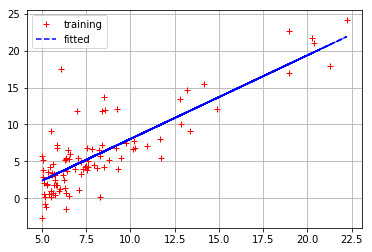

In [5]:
W, b = create_parameters(feature_cnt)

# batch learning
for epoch in range(0, 1000):
    h = linear_model(train_X, W, b)
    W, b = gd_update(train_X, train_y, h, W, b, mse_cost_dev, lr=0.01)
    if (epoch + 1) % 100 == 0:
        cur_cost = mse_cost(h, train_y)
        print('epoch: {0}, cost:{1}, W:{2}, b:{3}'.format(epoch + 1, cur_cost, W, b))

# finish
predictions = linear_model(train_X, W, b)
final_cost = mse_cost(predictions, train_y)
print('training finished!')
print('final cost: {0}, W: {1}, b: {2}'.format(final_cost, W, b))

# then plot some curves
plt.plot(train_X, train_y, 'r+', label='training')
plt.plot(train_X, predictions, 'b--', label='fitted')
plt.grid(True)
plt.legend()
plt.show()

## Multi-variable Linear Regression

### 1), prepare data 

In [69]:
train_data = np.array(pd.read_csv('./ex1data2.txt', header=None), dtype=np.float32)
#train_data = expand_feature_poly(train_data)
std_normalize(train_data)

sample_cnt = train_data.shape[0]
feature_cnt = train_data.shape[1] - 1
train_X = train_data[:,0:feature_cnt].reshape((sample_cnt, feature_cnt))
train_y = train_data[:,feature_cnt:feature_cnt+1].reshape((sample_cnt, 1))

### 2), model has already been defined, let's start training

epoch: 100, cost:0.20786905173240472
epoch: 200, cost:0.16611848246524843
training finished!
final cost: 0.16598999306478507


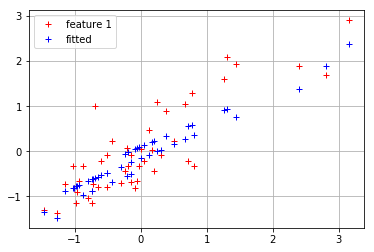

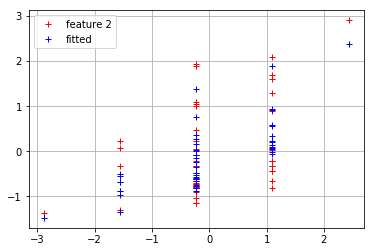

In [72]:
W, b = create_parameters(feature_cnt)

# batch learning
for epoch in range(0, 200):
    h = linear_model(train_X, W, b)
    W, b = gd_update(train_X, train_y, h, W, b, lr=0.01)
    if (epoch + 1) % 100 == 0:
        cur_cost = mse_cost(h, train_y)
        print('epoch: {0}, cost:{1}'.format(epoch + 1, cur_cost))

# finish
predictions = linear_model(train_X, W, b)
final_cost = mse_cost(predictions, train_y)
print('training finished!')
print('final cost: {0}'.format(final_cost))

# then plot some curves
plt.plot(train_X[:,0], train_y, 'r+', label='feature 1')
plt.plot(train_X[:,0], predictions, 'b+', label='fitted')
plt.grid(True)
plt.legend()
plt.show()
plt.plot(train_X[:,1], train_y, 'r+', label='feature 2')
plt.plot(train_X[:,1], predictions, 'b+', label='fitted')
plt.grid(True)
plt.legend()
plt.show()

### Play kaggle King County Housing Price data

#### 1), prepare data 

In [20]:
df = pd.read_csv('./kc_house_data.csv')
df = df.sample(frac=1).reset_index(drop=True)

In [22]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2070100040,20141201T000000,467000.0,3,1.75,2660,5511,1.0,0,0,...,8,1330,1330,1948,0,98108,47.5575,-122.300,2030,6111
1,2887950020,20140625T000000,280000.0,7,2.50,1940,5458,2.0,0,0,...,7,1940,0,1994,0,98092,47.3191,-122.177,1710,5688
2,2741100800,20140708T000000,315000.0,2,1.00,1080,2674,1.0,0,0,...,6,720,360,1919,0,98108,47.5595,-122.317,1250,5000
3,1473120190,20140530T000000,386000.0,3,2.00,2120,7560,1.0,0,0,...,9,2120,0,1991,0,98058,47.4350,-122.160,2660,7700
4,3438501450,20150507T000000,382000.0,2,1.00,870,10492,1.0,0,0,...,7,870,0,1937,0,98106,47.5467,-122.365,1300,7987
